In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("export_montecarlo_v.csv", engine='python', sep=";")

In [4]:
df.size

33990000

In [5]:
df.head()

,Corrida,Fecha,Nombre,Zona,Población,Cuarentena Total,Distanciamiento Social,Trabajo/Escuelas Remotos,Cierre de Fronteras Ext.,Cierre de Fronteras Internas,...,No Hospitlizados,Hospitalizados,Pacientes Aislados,Pacientes en TI,Pacientes Con Respirador,Pacientes Sin Respirador,Infectados Acumulados,Susceptibles,Recuperados,Fallecidos
0,1,03/02/2020,Interior de Buenos Aires,Provincia de BA,5708000,False,False,False,False,False,...,0,0,0,0,0,0,0,5708000,0,0
1,1,03/02/2020,24 Partidos del Gran Buenos Aires,Partidos del GBA,9917000,False,False,False,False,False,...,0,0,0,0,0,0,0,9917000,0,0
2,1,03/02/2020,Córdoba,Córdoba,3309000,False,False,False,False,False,...,0,0,0,0,0,0,0,3309000,0,0
3,1,03/02/2020,Santa Fe,Litoral,3195000,False,False,False,False,False,...,0,0,0,0,0,0,0,3195000,0,0
4,1,03/02/2020,Ciudad de Buenos Aires,CABA,2890000,False,False,False,False,False,...,0,0,0,0,0,0,0,2890000,0,0


In [6]:
df.keys()

Index(['Corrida', 'Fecha', 'Nombre', 'Zona', 'Población', 'Cuarentena Total',
       'Distanciamiento Social', 'Trabajo/Escuelas Remotos',
       'Cierre de Fronteras Ext.', 'Cierre de Fronteras Internas',
       '# Camas de Aislamiento', '# Camas de TI', ' # Respiradores',
       'Infectados', 'Asintomáticos', 'Sintomáticos', 'Leves', 'Moderados',
       'Críticos', 'No Detectados', 'Circulando', 'Aislados', 'Detectados',
       'No Hospitlizados', 'Hospitalizados', 'Pacientes Aislados',
       'Pacientes en TI', 'Pacientes Con Respirador',
       'Pacientes Sin Respirador', 'Infectados Acumulados', 'Susceptibles',
       'Recuperados', 'Fallecidos'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of          Corrida       Fecha                             Nombre  \
0              1  03/02/2020           Interior de Buenos Aires   
1              1  03/02/2020  24 Partidos del Gran Buenos Aires   
2              1  03/02/2020                            Córdoba   
3              1  03/02/2020                           Santa Fe   
4              1  03/02/2020             Ciudad de Buenos Aires   
...          ...         ...                                ...   
1029995      100  04/17/2021                          Catamarca   
1029996      100  04/17/2021                           La Rioja   
1029997      100  04/17/2021                           La Pampa   
1029998      100  04/17/2021                         Santa Cruz   
1029999      100  04/17/2021                   Tierra del Fuego   

                     Zona  Población  Cuarentena Total  \
0         Provincia de BA    5708000             False   
1        Partidos del GBA    9917000         

In [8]:
df_for_clauster = df[["Población", "Nombre"]].groupby("Nombre").mean().reset_index().sort_values("Población")


In [9]:
df_for_clauster

,Nombre,Población
23,Tierra del Fuego,127000
20,Santa Cruz,274000
11,La Pampa,319000
12,La Rioja,334000
1,Catamarca,368000
19,San Luis,432000
3,Chubut,509000
8,Formosa,530000
15,Neuquén,551000
16,Río Negro,639000


In [10]:
df_for_clauster["none"]="none"

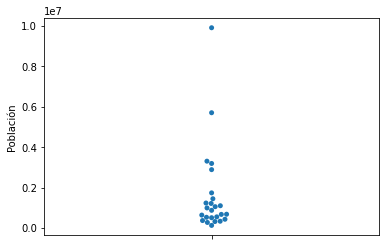

In [11]:
sns.swarmplot(y=df_for_clauster["Población"])

## a poblacion de los primeros 5 es distinta a la de los ultimos 5

In [12]:
df_Infected = df.groupby(["Nombre", "Corrida"]).max().Infectados.reset_index()

In [13]:
df_Infected

,Nombre,Corrida,Infectados
0,24 Partidos del Gran Buenos Aires,1,5539000
1,24 Partidos del Gran Buenos Aires,2,5674000
2,24 Partidos del Gran Buenos Aires,3,5555000
3,24 Partidos del Gran Buenos Aires,4,5665000
4,24 Partidos del Gran Buenos Aires,5,5465000
...,...,...,...
2495,Tucumán,96,782000
2496,Tucumán,97,837000
2497,Tucumán,98,866000
2498,Tucumán,99,798000


In [14]:
orden = list(df_Infected.groupby("Nombre").mean().sort_values("Infectados", ascending=False).index)

In [15]:
orden

['24 Partidos del Gran Buenos Aires',
 'Interior de Buenos Aires',
 'Córdoba',
 'Santa Fe',
 'Ciudad de Buenos Aires',
 'Mendoza',
 'Tucumán',
 'Salta',
 'Entre Ríos',
 'Misiones',
 'Chaco',
 'Corrientes',
 'Santiago del Estero',
 'San Juan',
 'Jujuy',
 'Río Negro',
 'Neuquén',
 'Chubut',
 'Formosa',
 'San Luis',
 'Catamarca',
 'La Pampa',
 'La Rioja',
 'Santa Cruz',
 'Tierra del Fuego']

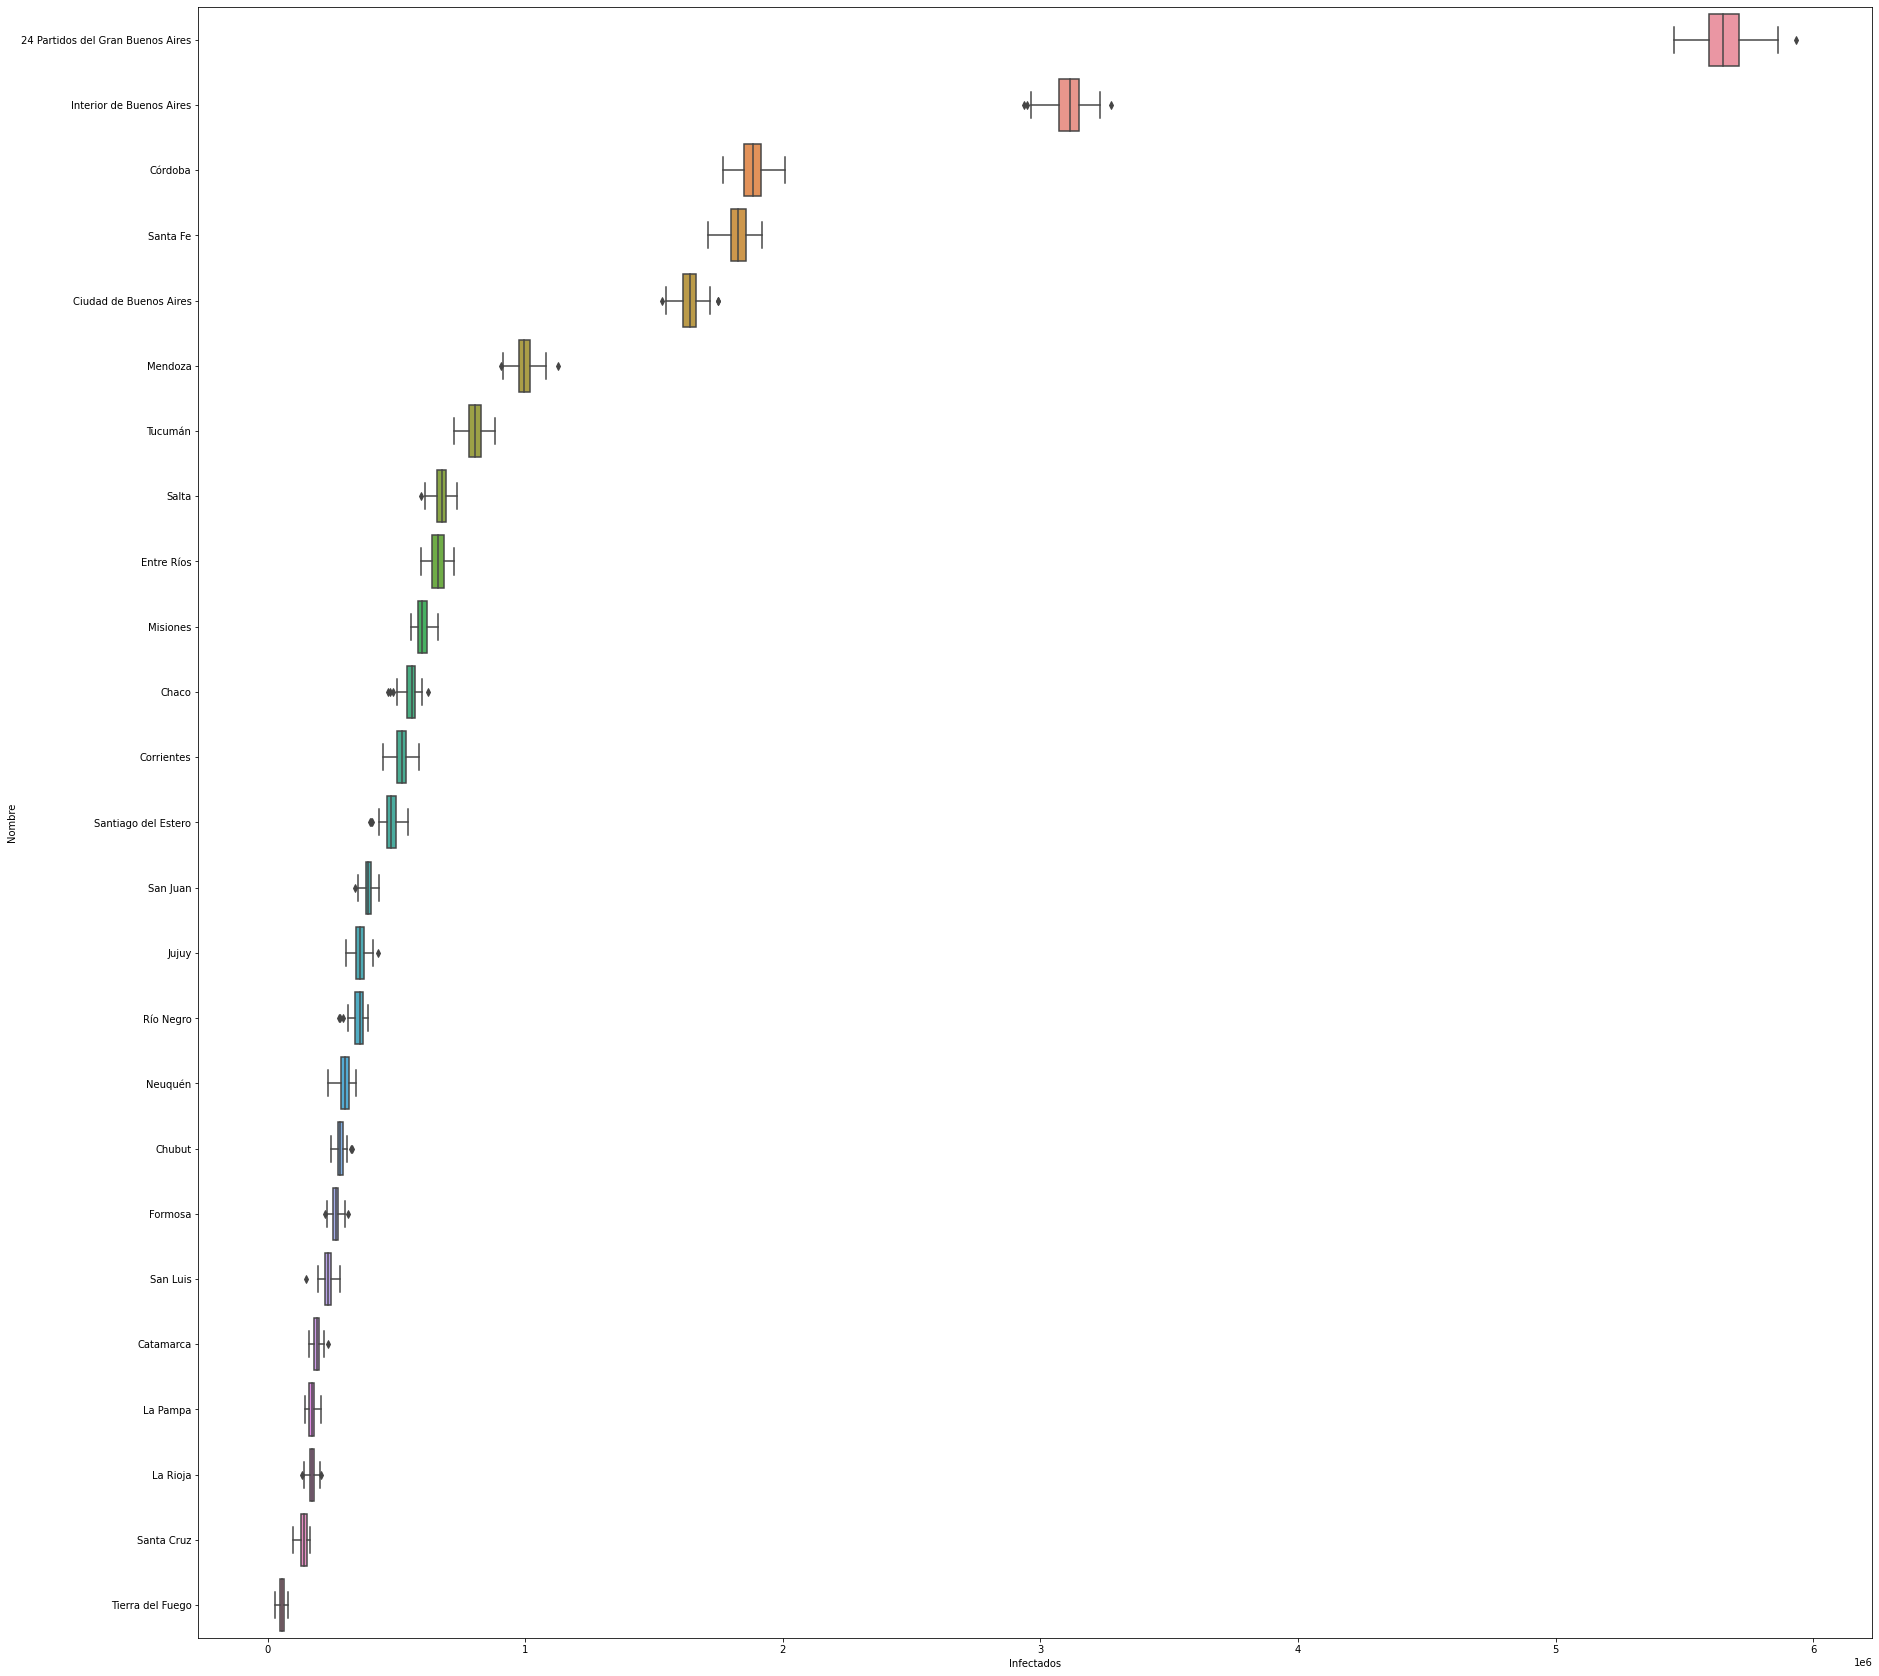

In [16]:
plt.figure(figsize=(30,30))

sns.boxplot(x=df_Infected.Infectados, y=df_Infected.Nombre, order=orden)

## Se ve claro el problema de poblacion, por lo que voy a tratar los 2 graf por sep

In [17]:
df_Infected_G1 = df_Infected[df_Infected.Nombre.isin(orden[:5])]
df_Infected_G2 = df_Infected[~df_Infected.Nombre.isin(orden[:5])]

In [18]:
df_Infected_G1.head()

,Nombre,Corrida,Infectados
0,24 Partidos del Gran Buenos Aires,1,5539000
1,24 Partidos del Gran Buenos Aires,2,5674000
2,24 Partidos del Gran Buenos Aires,3,5555000
3,24 Partidos del Gran Buenos Aires,4,5665000
4,24 Partidos del Gran Buenos Aires,5,5465000


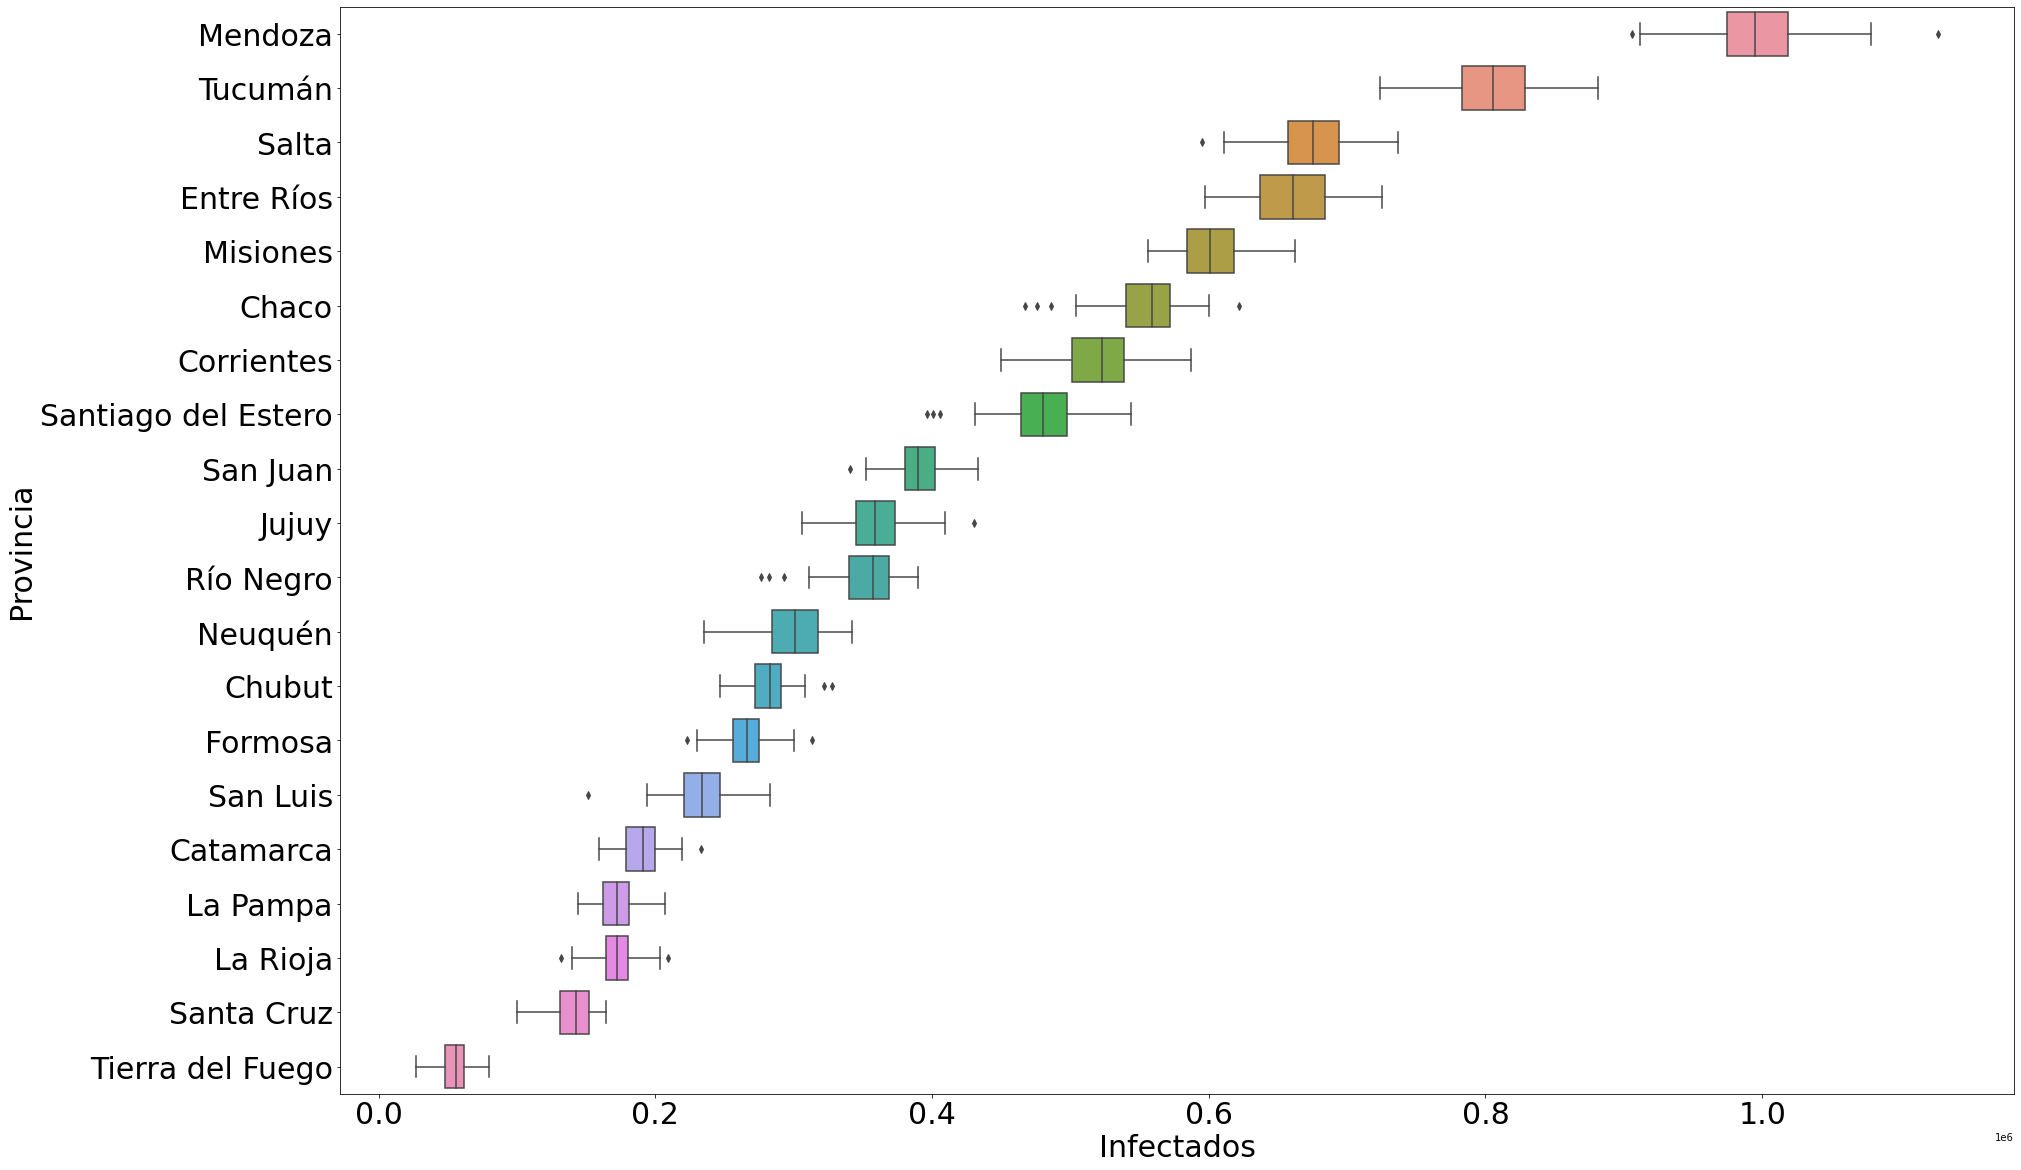

In [19]:
plt.figure(figsize=(30,20))
boxplot_G2= sns.boxplot(x=df_Infected_G2.Infectados, y=df_Infected_G2.Nombre, order=orden[5:])
boxplot_G2.set_xlabel("Infectados",fontsize=30)
boxplot_G2.set_ylabel("Provincia", fontsize=30)
boxplot_G2.tick_params(labelsize=30)
boxplot_G2.ticklabel_format(style='sci', axis='X')

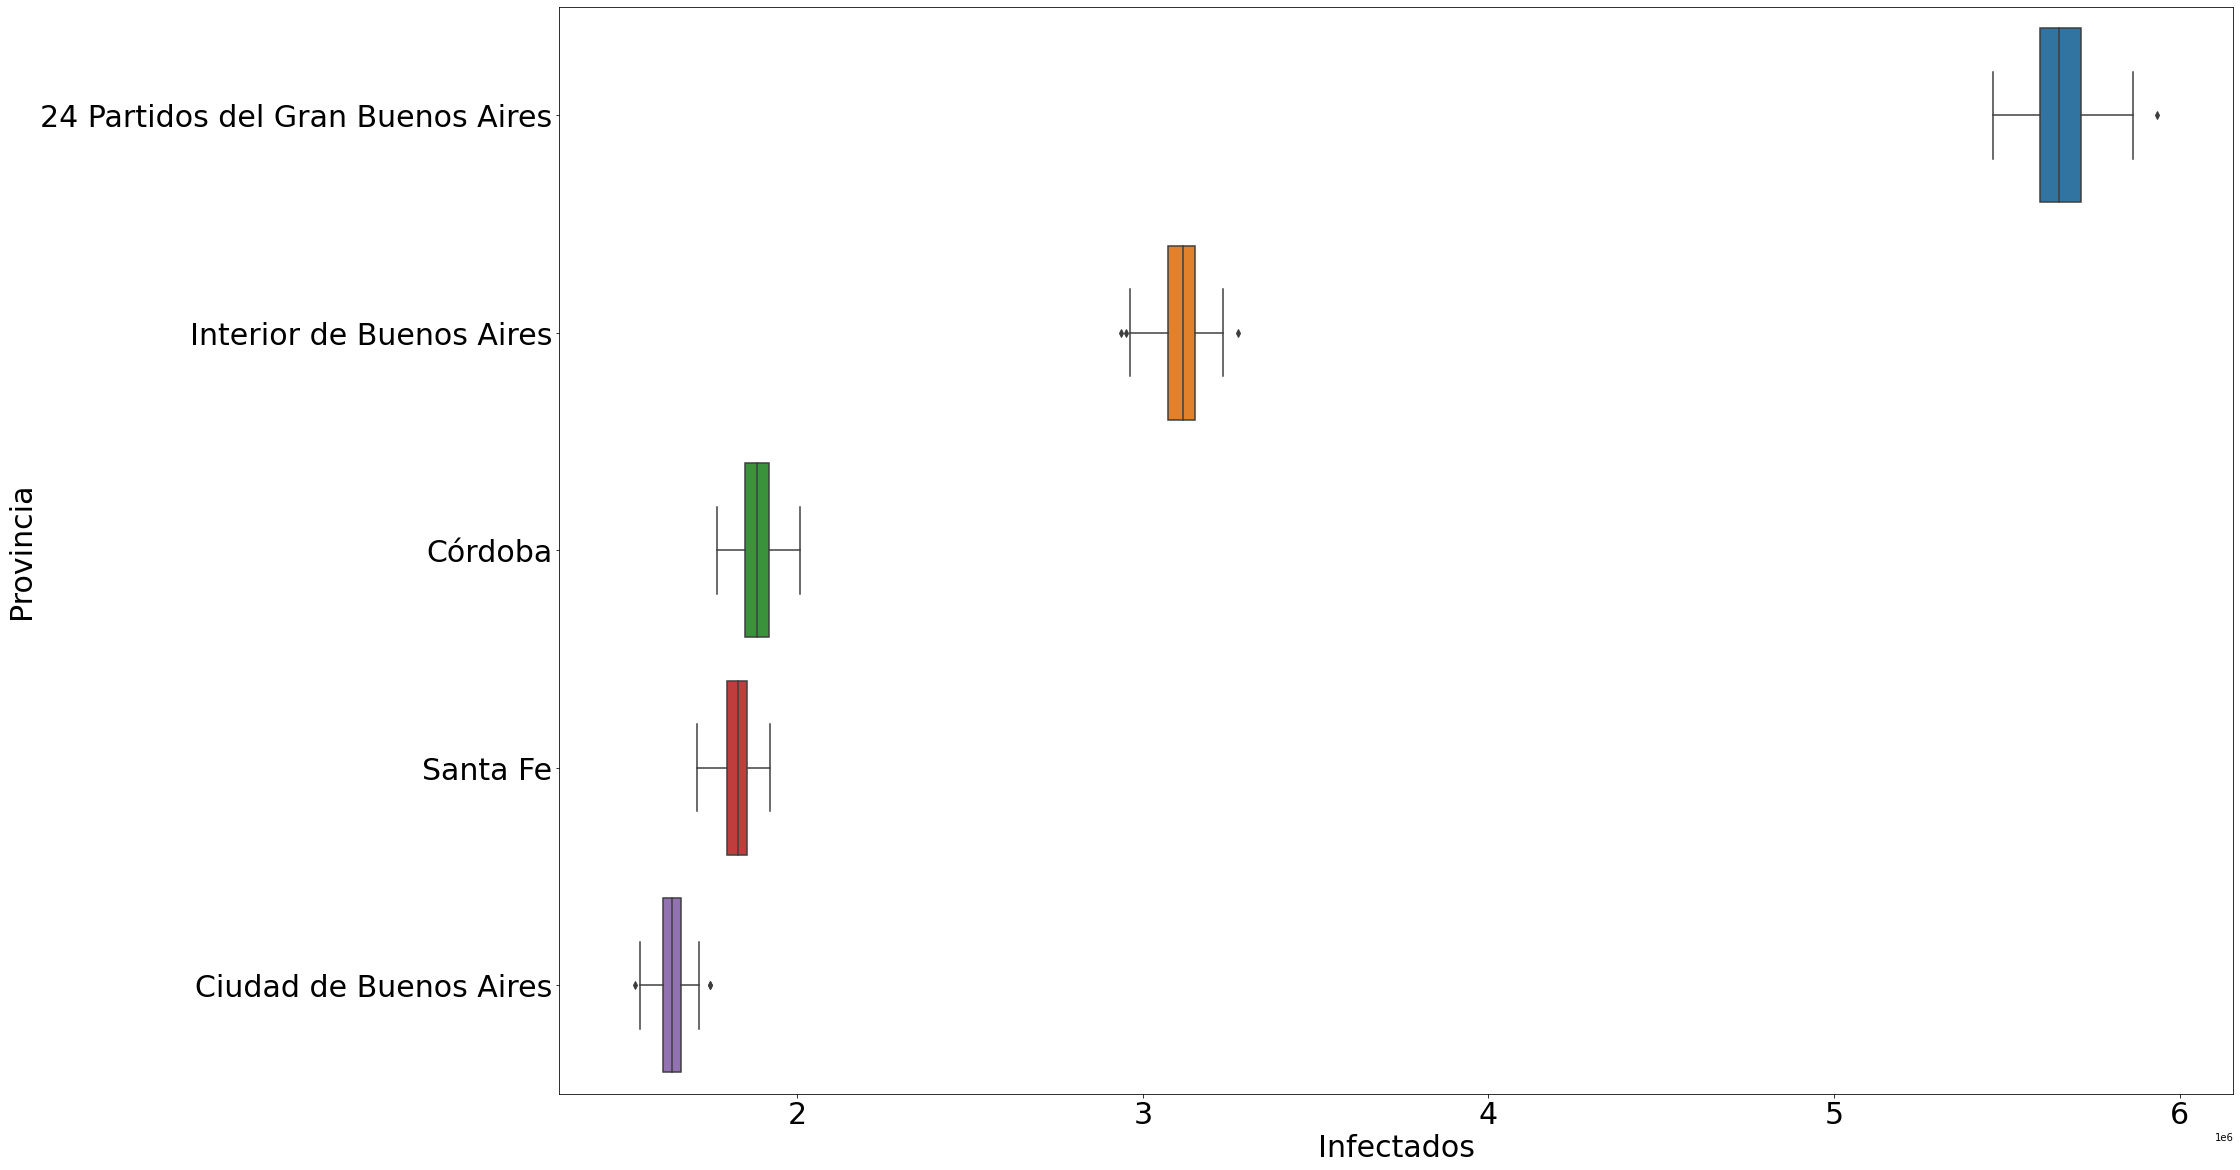

In [20]:
plt.figure(figsize=(30,20))
boxplot_G1 = sns.boxplot(x=df_Infected_G1.Infectados, y=df_Infected_G1.Nombre, order=orden[:5])
boxplot_G1.set_xlabel("Infectados",fontsize=30)
boxplot_G1.set_ylabel("Provincia", fontsize=30)
boxplot_G1.tick_params(labelsize=30)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df_prueba = pd.DataFrame(dict(x=x, g=g))

In [22]:
df_prueba

,x,g
0,-0.961877,A
1,0.147050,B
2,-0.629989,C
3,0.791019,D
4,1.583534,E
...,...,...
495,-0.641978,F
496,1.212877,G
497,-1.525753,H
498,0.251022,I


In [23]:
m = df_prueba.g.map(ord)
df_prueba["x"] += m

In [24]:
m

0      65
1      66
2      67
3      68
4      69
       ..
495    70
496    71
497    72
498    73
499    74
Name: g, Length: 500, dtype: int64

In [25]:
df_prueba.head()

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E


c:\users\g.martinez.bidal\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
c:\users\g.martinez.bidal\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


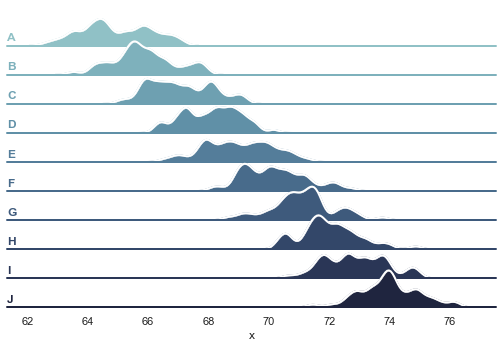

In [26]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_prueba, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [27]:
df_Infected_G2.head()

,Nombre,Corrida,Infectados
100,Catamarca,1,207000
101,Catamarca,2,201000
102,Catamarca,3,198000
103,Catamarca,4,204000
104,Catamarca,5,184000


In [28]:
df_Infected_G2 = df_Infected_G2.drop(columns=['Corrida'])
means = df_Infected_G2.groupby("Nombre").mean().reset_index().rename(columns={'Infectados':'mean'})
mer = pd.merge(df_Infected_G2, means, on='Nombre')
df_Infected_G2 = mer.sort_values("mean").drop(columns=['mean'])

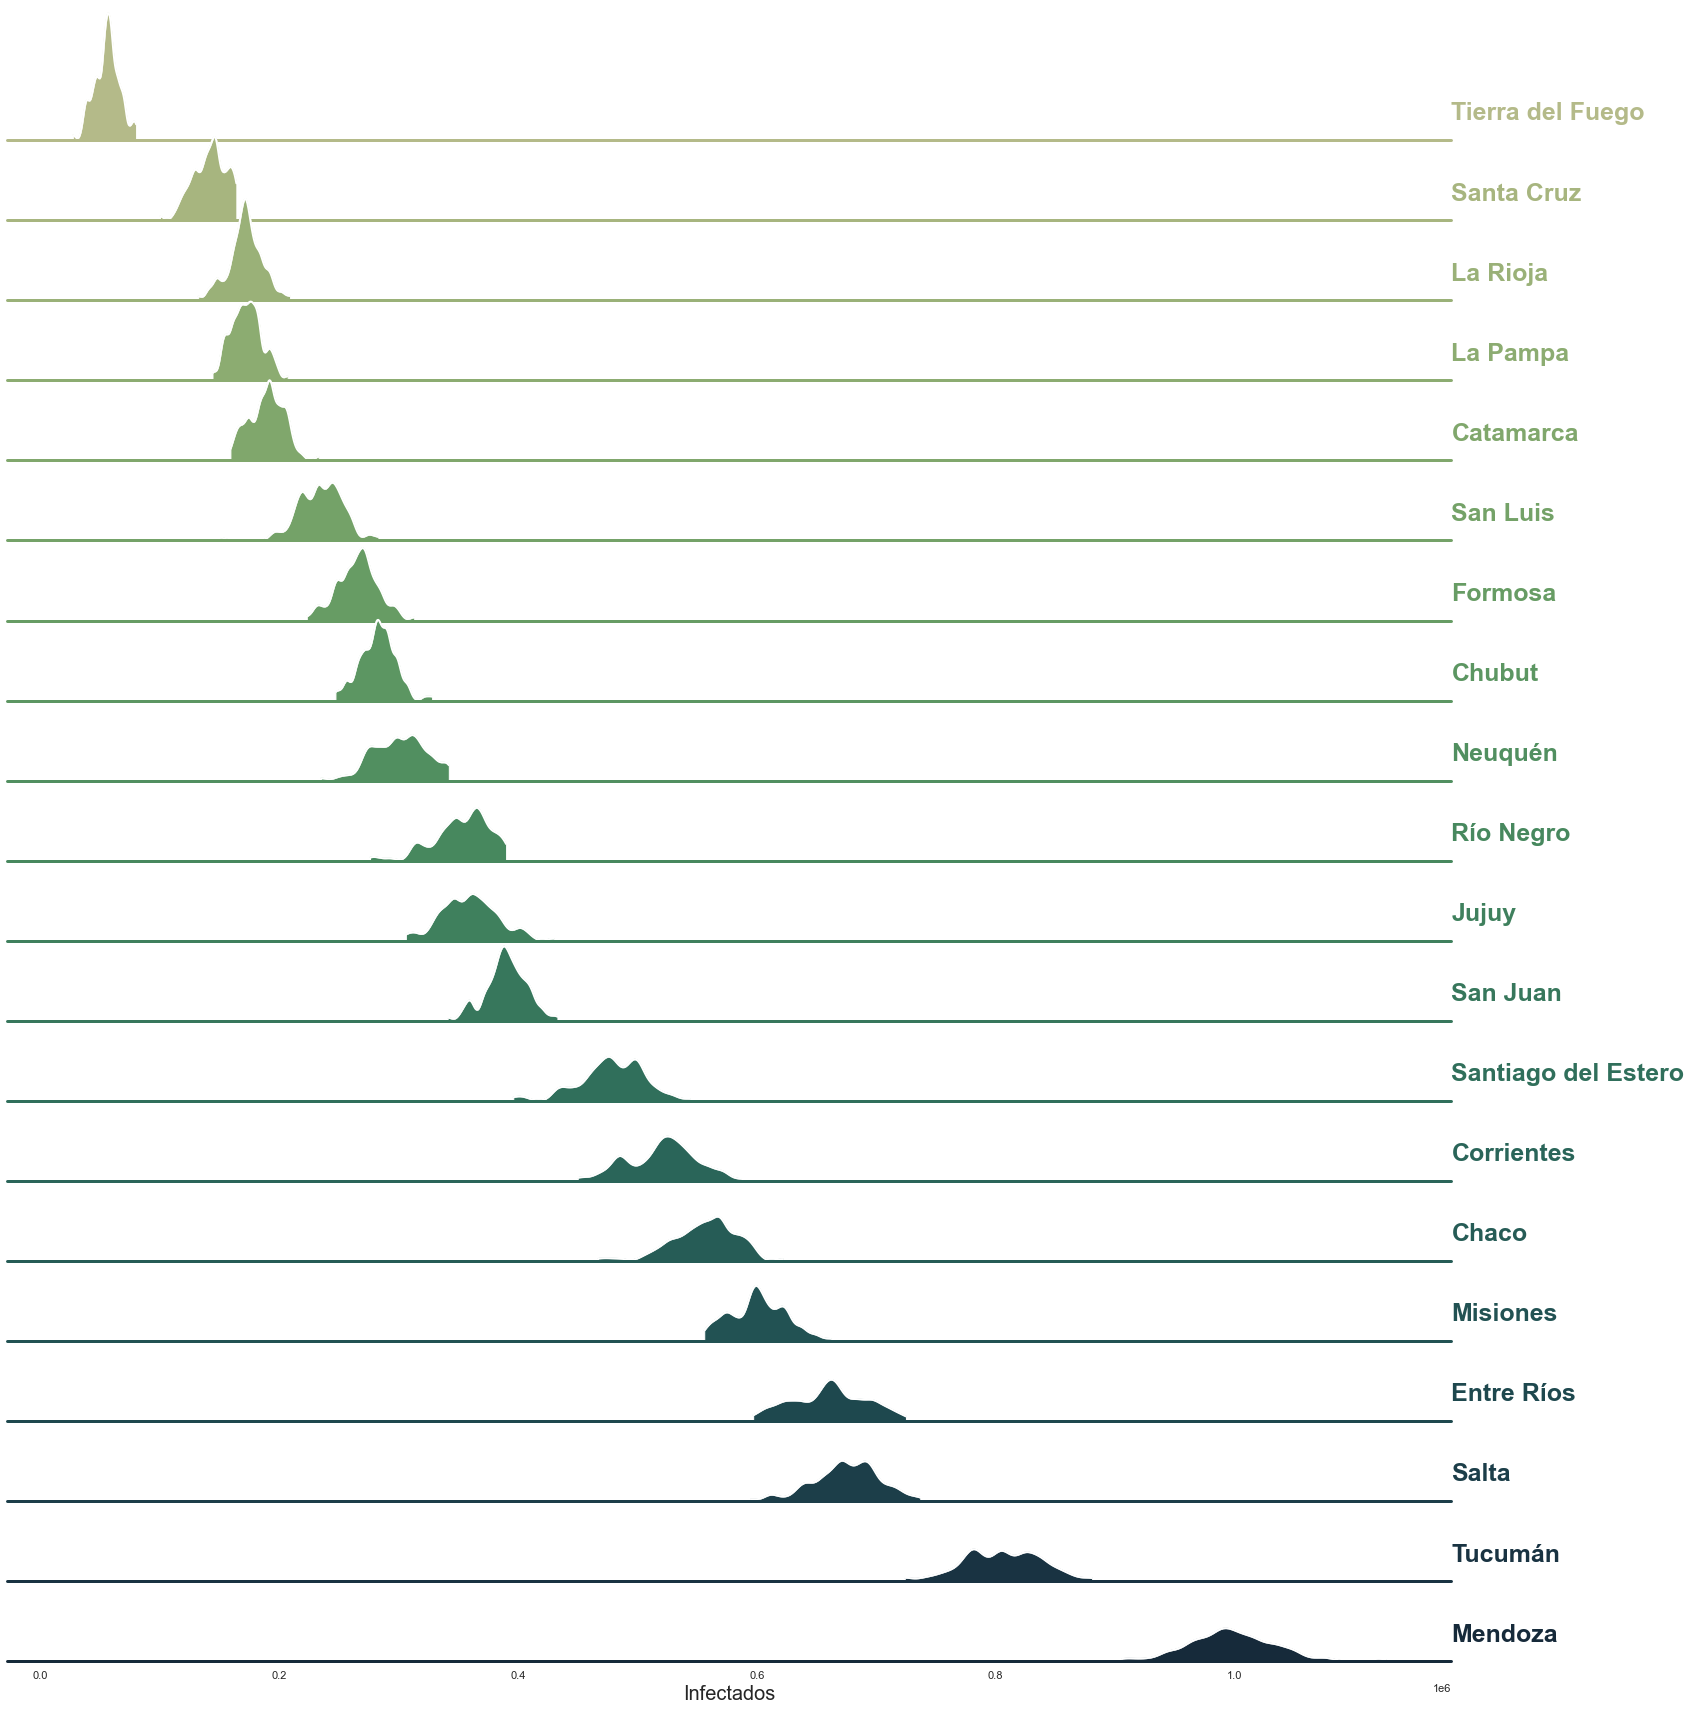

In [29]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected_G2, row="Nombre", hue="Nombre", aspect=20, height=1.2, palette=pal)

#
import matplotlib.ticker as tkr

#formatter = tkr.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True)
#formatter.set_powerlimits((-2, 2))

#sns.heatmap(x, cbar_kws={"format": formatter})
#

# cbar_kws={"format": formatter},
# Draw the densities in a few steps
g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)



# Define and use a simple function to label the plot in axes coordinates
def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)


g.map(label, "Infectados")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.4)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
#g.set_xticklabels(fontsize=40)
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
#plt.ticklabel_format(style='plain')
plt.rc('xtick', labelsize=20)

In [30]:
df_Infected_G1 = df_Infected_G1.drop(columns=['Corrida'])
means = df_Infected_G1.groupby("Nombre").mean().reset_index().rename(columns={'Infectados':'mean'})
mer = pd.merge(df_Infected_G1, means, on='Nombre')
df_Infected_G1 = mer.sort_values("mean").drop(columns=['mean'])

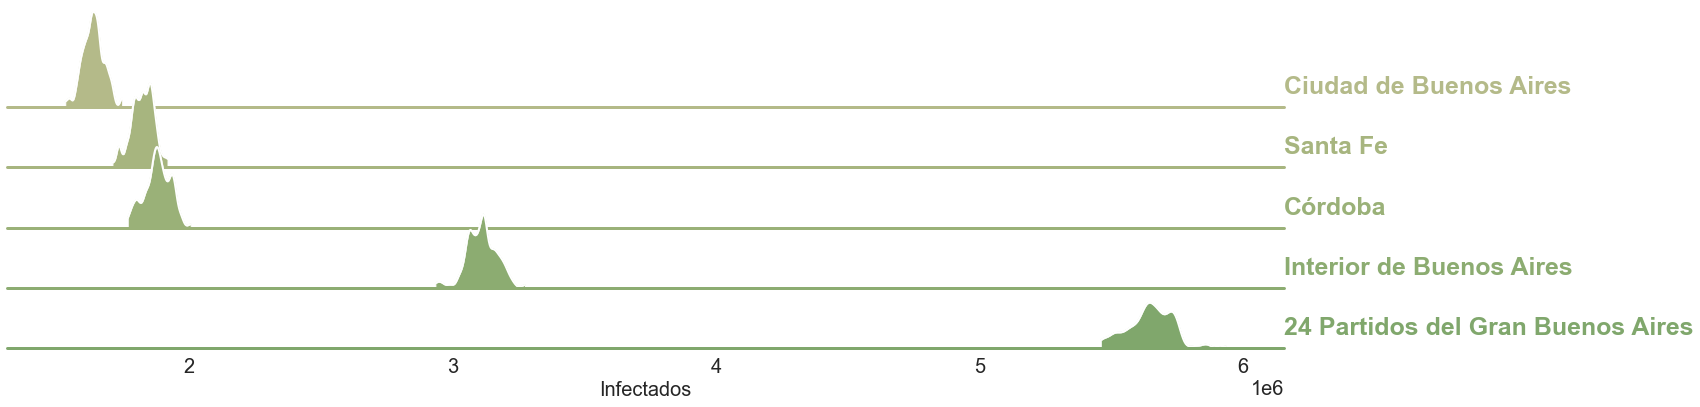

In [31]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_Infected_G1, row="Nombre", hue="Nombre", aspect=20, height=1.2, palette=pal)

#
import matplotlib.ticker as tkr

#formatter = tkr.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True)
#formatter.set_powerlimits((-2, 2))

#sns.heatmap(x, cbar_kws={"format": formatter})
#

# cbar_kws={"format": formatter},
# Draw the densities in a few steps
g.map(sns.kdeplot, "Infectados", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Infectados", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)



# Define and use a simple function to label the plot in axes coordinates
def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)


g.map(label, "Infectados")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.4)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
#g.set_xticklabels(fontsize=20)
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
#plt.ticklabel_format(style='plain')

In [32]:
df.head()

,Corrida,Fecha,Nombre,Zona,Población,Cuarentena Total,Distanciamiento Social,Trabajo/Escuelas Remotos,Cierre de Fronteras Ext.,Cierre de Fronteras Internas,...,No Hospitlizados,Hospitalizados,Pacientes Aislados,Pacientes en TI,Pacientes Con Respirador,Pacientes Sin Respirador,Infectados Acumulados,Susceptibles,Recuperados,Fallecidos
0,1,03/02/2020,Interior de Buenos Aires,Provincia de BA,5708000,False,False,False,False,False,...,0,0,0,0,0,0,0,5708000,0,0
1,1,03/02/2020,24 Partidos del Gran Buenos Aires,Partidos del GBA,9917000,False,False,False,False,False,...,0,0,0,0,0,0,0,9917000,0,0
2,1,03/02/2020,Córdoba,Córdoba,3309000,False,False,False,False,False,...,0,0,0,0,0,0,0,3309000,0,0
3,1,03/02/2020,Santa Fe,Litoral,3195000,False,False,False,False,False,...,0,0,0,0,0,0,0,3195000,0,0
4,1,03/02/2020,Ciudad de Buenos Aires,CABA,2890000,False,False,False,False,False,...,0,0,0,0,0,0,0,2890000,0,0


In [33]:
df.dtypes

Corrida                           int64
Fecha                            object
Nombre                           object
Zona                             object
Población                         int64
Cuarentena Total                   bool
Distanciamiento Social             bool
Trabajo/Escuelas Remotos           bool
Cierre de Fronteras Ext.           bool
Cierre de Fronteras Internas       bool
# Camas de Aislamiento          float64
# Camas de TI                   float64
 # Respiradores                 float64
Infectados                        int64
Asintomáticos                     int64
Sintomáticos                      int64
Leves                             int64
Moderados                         int64
Críticos                          int64
No Detectados                     int64
Circulando                        int64
Aislados                          int64
Detectados                        int64
No Hospitlizados                  int64
Hospitalizados                    int64


In [34]:
df.Fecha = pd.to_datetime(df.Fecha)

In [35]:
df.dtypes

Corrida                                  int64
Fecha                           datetime64[ns]
Nombre                                  object
Zona                                    object
Población                                int64
Cuarentena Total                          bool
Distanciamiento Social                    bool
Trabajo/Escuelas Remotos                  bool
Cierre de Fronteras Ext.                  bool
Cierre de Fronteras Internas              bool
# Camas de Aislamiento                 float64
# Camas de TI                          float64
 # Respiradores                        float64
Infectados                               int64
Asintomáticos                            int64
Sintomáticos                             int64
Leves                                    int64
Moderados                                int64
Críticos                                 int64
No Detectados                            int64
Circulando                               int64
Aislados     

# Start with Df fechas

In [36]:
df_fechas = df[["Nombre", "Fecha", "Zona", "Infectados", "Corrida"]]

In [37]:
df_fechas.head()

,Nombre,Fecha,Zona,Infectados,Corrida
0,Interior de Buenos Aires,2020-03-02,Provincia de BA,0,1
1,24 Partidos del Gran Buenos Aires,2020-03-02,Partidos del GBA,0,1
2,Córdoba,2020-03-02,Córdoba,0,1
3,Santa Fe,2020-03-02,Litoral,0,1
4,Ciudad de Buenos Aires,2020-03-02,CABA,0,1


In [38]:
df_fechas[(df_fechas.Nombre == "24 Partidos del Gran Buenos Aires") & (df_fechas.Corrida == 4)][200:260]

,Nombre,Fecha,Zona,Infectados,Corrida
35901,24 Partidos del Gran Buenos Aires,2020-09-18,Partidos del GBA,8000,4
35926,24 Partidos del Gran Buenos Aires,2020-09-19,Partidos del GBA,8000,4
35951,24 Partidos del Gran Buenos Aires,2020-09-20,Partidos del GBA,8000,4
35976,24 Partidos del Gran Buenos Aires,2020-09-21,Partidos del GBA,8000,4
36001,24 Partidos del Gran Buenos Aires,2020-09-22,Partidos del GBA,7000,4
36026,24 Partidos del Gran Buenos Aires,2020-09-23,Partidos del GBA,7000,4
36051,24 Partidos del Gran Buenos Aires,2020-09-24,Partidos del GBA,8000,4
36076,24 Partidos del Gran Buenos Aires,2020-09-25,Partidos del GBA,8000,4
36101,24 Partidos del Gran Buenos Aires,2020-09-26,Partidos del GBA,9000,4
36126,24 Partidos del Gran Buenos Aires,2020-09-27,Partidos del GBA,9000,4


In [39]:
df_aux = df_fechas[df_fechas["Infectados"] > 0]
df_fechas_inicio_por_region = df_aux.groupby(["Corrida", "Nombre"]).min().reset_index()

In [40]:
df_fechas_inicio_por_region[df_fechas_inicio_por_region["Corrida"] == 4]

,Corrida,Nombre,Fecha,Zona,Infectados
75,4,24 Partidos del Gran Buenos Aires,2020-03-21,Partidos del GBA,1000
76,4,Catamarca,2020-06-06,Norte,1000
77,4,Chaco,2020-03-21,Litoral,1000
78,4,Chubut,2020-05-23,Patagonia,1000
79,4,Ciudad de Buenos Aires,2020-03-21,CABA,1000
80,4,Corrientes,2020-03-21,Litoral,1000
81,4,Córdoba,2020-03-21,Córdoba,1000
82,4,Entre Ríos,2020-03-21,Litoral,1000
83,4,Formosa,2020-06-03,Litoral,2000
84,4,Interior de Buenos Aires,2020-03-30,Provincia de BA,1000


In [41]:
df_fechas_inicio_por_region.head()

,Corrida,Nombre,Fecha,Zona,Infectados
0,1,24 Partidos del Gran Buenos Aires,2020-03-21,Partidos del GBA,1000
1,1,Catamarca,2020-06-03,Norte,1000
2,1,Chaco,2020-03-21,Litoral,1000
3,1,Chubut,2020-05-25,Patagonia,1000
4,1,Ciudad de Buenos Aires,2020-03-21,CABA,1000


In [42]:
df_fechas_inicio_por_region[df_fechas_inicio_por_region.Corrida == 4]

,Corrida,Nombre,Fecha,Zona,Infectados
75,4,24 Partidos del Gran Buenos Aires,2020-03-21,Partidos del GBA,1000
76,4,Catamarca,2020-06-06,Norte,1000
77,4,Chaco,2020-03-21,Litoral,1000
78,4,Chubut,2020-05-23,Patagonia,1000
79,4,Ciudad de Buenos Aires,2020-03-21,CABA,1000
80,4,Corrientes,2020-03-21,Litoral,1000
81,4,Córdoba,2020-03-21,Córdoba,1000
82,4,Entre Ríos,2020-03-21,Litoral,1000
83,4,Formosa,2020-06-03,Litoral,2000
84,4,Interior de Buenos Aires,2020-03-30,Provincia de BA,1000


In [43]:
df_fechas_inicio_por_region = df_fechas_inicio_por_region.drop(columns=["Zona", "Infectados"])

In [44]:
df_fechas_inicio_por_region.head()

,Corrida,Nombre,Fecha
0,1,24 Partidos del Gran Buenos Aires,2020-03-21
1,1,Catamarca,2020-06-03
2,1,Chaco,2020-03-21
3,1,Chubut,2020-05-25
4,1,Ciudad de Buenos Aires,2020-03-21


In [45]:
df_aux = df_fechas[df_fechas.Infectados > 0]
df_fechas_max = df_aux.groupby(["Corrida","Nombre"]).max().reset_index()

In [46]:
df_fechas_max.head()

,Corrida,Nombre,Fecha,Zona,Infectados
0,1,24 Partidos del Gran Buenos Aires,2021-04-17,Partidos del GBA,5539000
1,1,Catamarca,2020-09-19,Norte,207000
2,1,Chaco,2020-09-05,Litoral,486000
3,1,Chubut,2020-10-27,Patagonia,279000
4,1,Ciudad de Buenos Aires,2021-04-17,CABA,1667000


In [47]:
df_fechas_max["Concat"] = df_fechas_max["Corrida"].astype(str) + "&" + df_fechas_max["Infectados"].astype(str) + "&" + df_fechas_max["Nombre"].astype(str)
df_fechas["Concat"] = df_fechas["Corrida"].astype(str) + "&" + df_fechas["Infectados"].astype(str) + "&" + df_fechas["Nombre"].astype(str)

<ipython-input-47-685d976195ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas["Concat"] = df_fechas["Corrida"].astype(str) + "&" + df_fechas["Infectados"].astype(str) + "&" + df_fechas["Nombre"].astype(str)


In [48]:
df_fechas_max = df_fechas[df_fechas["Concat"].isin(df_fechas_max["Concat"])].drop(columns='Concat').groupby(
    ["Nombre", "Corrida"]).min().reset_index()

In [49]:
df_fechas_max.head()

,Nombre,Corrida,Fecha,Zona,Infectados
0,24 Partidos del Gran Buenos Aires,1,2020-07-02,Partidos del GBA,5539000
1,24 Partidos del Gran Buenos Aires,2,2020-07-06,Partidos del GBA,5674000
2,24 Partidos del Gran Buenos Aires,3,2020-07-07,Partidos del GBA,5555000
3,24 Partidos del Gran Buenos Aires,4,2020-07-07,Partidos del GBA,5665000
4,24 Partidos del Gran Buenos Aires,5,2020-07-05,Partidos del GBA,5465000


In [50]:
df_fechas_max[df_fechas_max.Corrida == 2]

,Nombre,Corrida,Fecha,Zona,Infectados
1,24 Partidos del Gran Buenos Aires,2,2020-07-06,Partidos del GBA,5674000
101,Catamarca,2,2020-08-01,Norte,201000
201,Chaco,2,2020-08-03,Litoral,563000
301,Chubut,2,2020-07-25,Patagonia,272000
401,Ciudad de Buenos Aires,2,2020-07-05,CABA,1613000
501,Corrientes,2,2020-07-13,Litoral,534000
601,Córdoba,2,2020-07-03,Córdoba,1829000
701,Entre Ríos,2,2020-08-05,Litoral,643000
801,Formosa,2,2020-08-02,Litoral,271000
901,Interior de Buenos Aires,2,2020-07-16,Provincia de BA,3120000


In [51]:
df_fec = df_fechas_max.merge(df_fechas_inicio_por_region, on=["Nombre", "Corrida"]).rename(columns={"Fecha_x":"Fecha_max", "Fecha_y":"Fecha_inicio"})

In [52]:
df_fec["Dias_Hasta_El_Pico"] = (df_fec.Fecha_max - df_fec.Fecha_inicio).dt.days

In [53]:
df_fec.head()

,Nombre,Corrida,Fecha_max,Zona,Infectados,Fecha_inicio,Dias_Hasta_El_Pico
0,24 Partidos del Gran Buenos Aires,1,2020-07-02,Partidos del GBA,5539000,2020-03-21,103
1,24 Partidos del Gran Buenos Aires,2,2020-07-06,Partidos del GBA,5674000,2020-03-21,107
2,24 Partidos del Gran Buenos Aires,3,2020-07-07,Partidos del GBA,5555000,2020-03-21,108
3,24 Partidos del Gran Buenos Aires,4,2020-07-07,Partidos del GBA,5665000,2020-03-21,108
4,24 Partidos del Gran Buenos Aires,5,2020-07-05,Partidos del GBA,5465000,2020-03-21,106


In [54]:
df_fec.Nombre.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

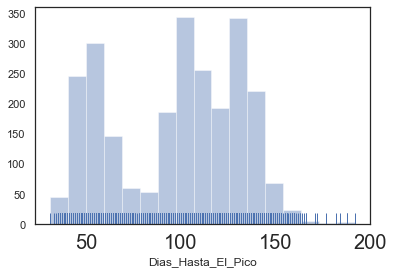

In [55]:
sns.distplot(df_fec["Dias_Hasta_El_Pico"], kde=False, rug=True)

In [56]:
df_fec_2 = df_fec.drop(columns=['Corrida'])

In [57]:
df_fec_2.Nombre.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [58]:
means_fec = df_fec_2.groupby("Nombre").mean().reset_index().rename(columns={'Dias_Hasta_El_Pico':'mean'})

In [59]:
means_fec.Nombre.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [60]:
mer = pd.merge(df_fec_2, means_fec, on='Nombre')

In [61]:
mer.Nombre.unique()

array(['24 Partidos del Gran Buenos Aires', 'Catamarca', 'Chaco',
       'Chubut', 'Ciudad de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Interior de Buenos Aires', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

In [62]:

df_fec = mer.sort_values("mean").drop(columns=['mean'])

In [63]:
df_fec.Nombre.unique()

array(['La Rioja', 'San Juan', 'Formosa', 'La Pampa', 'Chubut',
       'Catamarca', 'Misiones', 'Santa Fe', 'Mendoza',
       'Interior de Buenos Aires', '24 Partidos del Gran Buenos Aires',
       'Ciudad de Buenos Aires', 'Córdoba', 'Neuquén',
       'Santiago del Estero', 'Corrientes', 'San Luis', 'Salta',
       'Río Negro', 'Entre Ríos', 'Jujuy', 'Tucumán', 'Chaco',
       'Santa Cruz', 'Tierra del Fuego'], dtype=object)

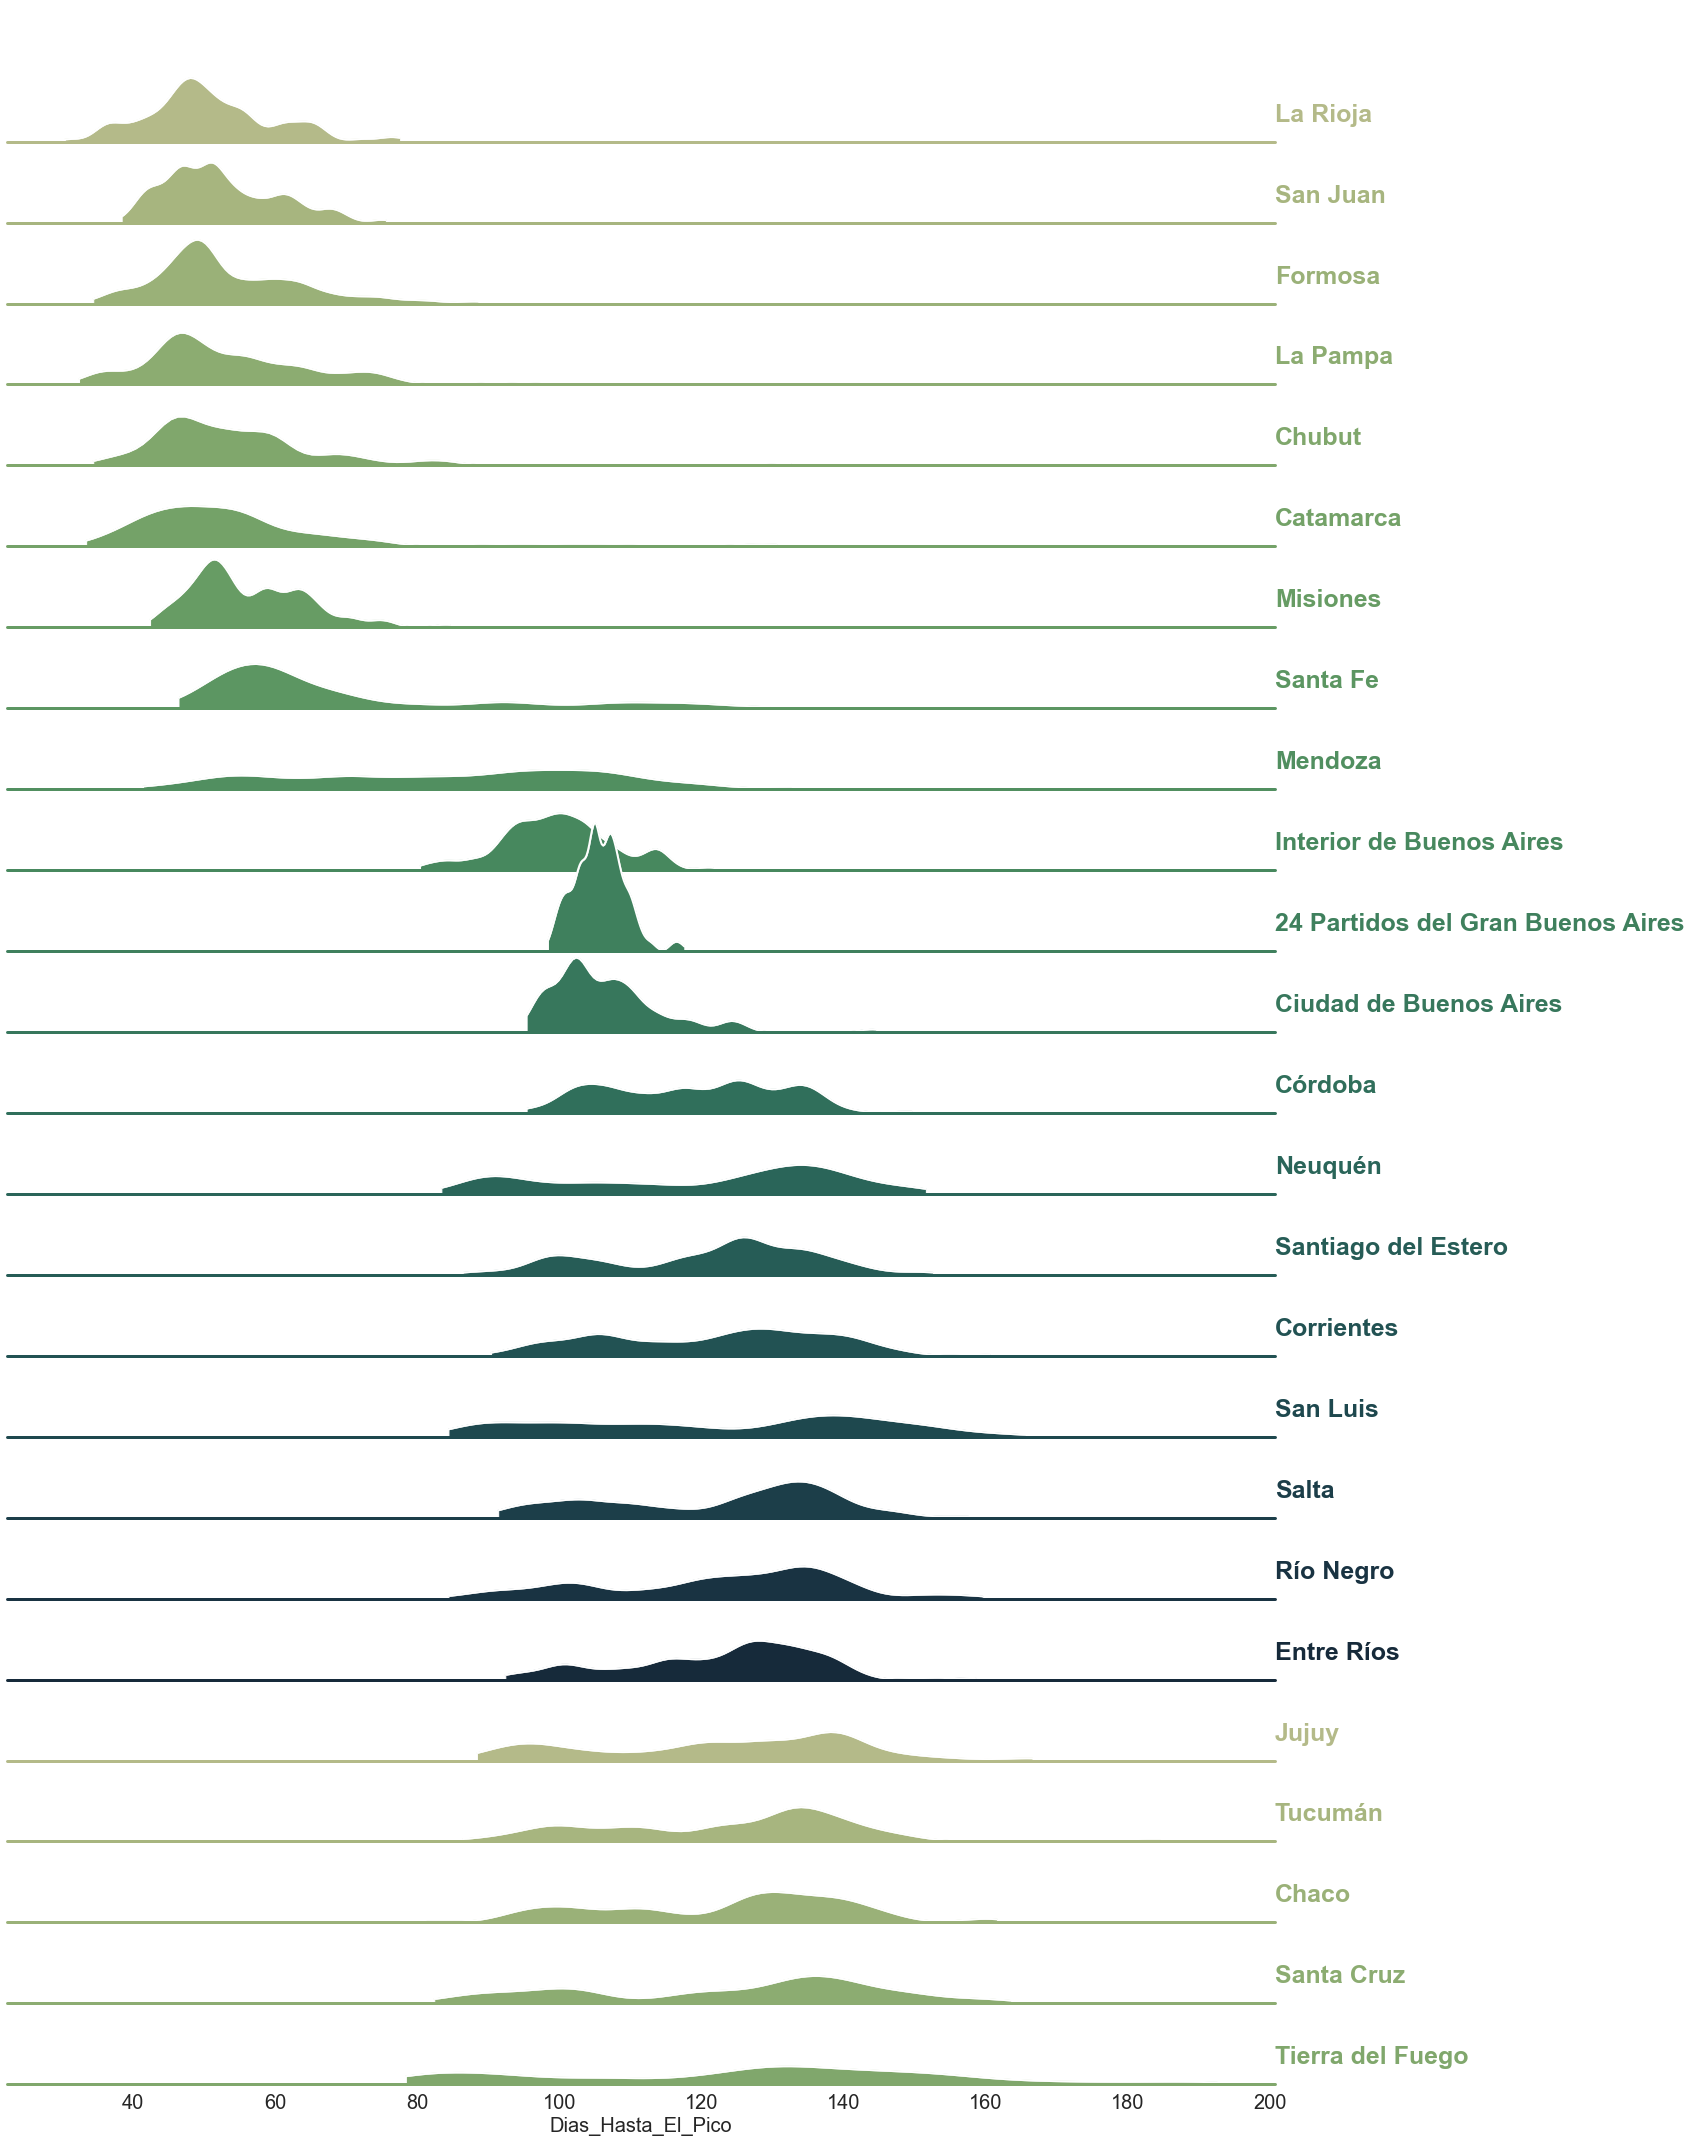

In [64]:
pal = sns.cubehelix_palette(20, rot=-.70, light=.7)
g = sns.FacetGrid(df_fec, row="Nombre", hue="Nombre", aspect=20, height=1.2, palette=pal)


import matplotlib.ticker as tkr

g.map(sns.kdeplot, "Dias_Hasta_El_Pico", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "Dias_Hasta_El_Pico", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=3, clip_on=False)

def label(Infectados, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=25)


g.map(label, "Dias_Hasta_El_Pico")

g.fig.subplots_adjust(hspace=-.4)

g.set_titles("")
g.set(yticks=[])
g.set_xlabels(fontsize=20)
g.despine(bottom=True, left=True)
plt.rc('xtick', labelsize=30)

# Saturacion de Hospitales

In [65]:
df.keys()

Index(['Corrida', 'Fecha', 'Nombre', 'Zona', 'Población', 'Cuarentena Total',
       'Distanciamiento Social', 'Trabajo/Escuelas Remotos',
       'Cierre de Fronteras Ext.', 'Cierre de Fronteras Internas',
       '# Camas de Aislamiento', '# Camas de TI', ' # Respiradores',
       'Infectados', 'Asintomáticos', 'Sintomáticos', 'Leves', 'Moderados',
       'Críticos', 'No Detectados', 'Circulando', 'Aislados', 'Detectados',
       'No Hospitlizados', 'Hospitalizados', 'Pacientes Aislados',
       'Pacientes en TI', 'Pacientes Con Respirador',
       'Pacientes Sin Respirador', 'Infectados Acumulados', 'Susceptibles',
       'Recuperados', 'Fallecidos'],
      dtype='object')

In [66]:
df_hospitales = df[["Corrida", "Fecha", "Nombre", "Población", "# Camas de Aislamiento", "# Camas de TI",
                    " # Respiradores", "Hospitalizados", "Pacientes en TI", "Pacientes Con Respirador"]]

In [67]:
pr = df_hospitales.groupby(["Corrida", "Nombre"]).max().reset_index()

In [68]:
pr[pr["# Camas de TI"] != pr["Pacientes en TI"]]

,Corrida,Nombre,Fecha,Población,# Camas de Aislamiento,# Camas de TI,# Respiradores,Hospitalizados,Pacientes en TI,Pacientes Con Respirador
23,1,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
37,2,La Rioja,2021-04-17,334000,1000.0,1000.0,1000.0,1000,0,0
48,2,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
73,3,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
98,4,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
...,...,...,...,...,...,...,...,...,...,...
2348,94,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
2361,95,La Pampa,2021-04-17,319000,1000.0,1000.0,1000.0,1000,0,0
2373,95,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0
2398,96,Tierra del Fuego,2021-04-17,127000,1000.0,1000.0,1000.0,1000,0,0


In [69]:
pr[pr["ombre"]]

KeyError: 'ombre'

In [ ]:
df_hospitales[df_hospitales.Nombre=="Tierra del Fuego"]